<a href="https://colab.research.google.com/github/TruongVuGoBrrrrr/BaiTapAI20104074/blob/BTVN-NhanDien/NhanDien10loaiHoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [51]:
train_image = '/content/drive/MyDrive/Data Train/flowers/Train'
valid_image = '/content/drive/MyDrive/Data Train/flowers/Val'

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow_from_directory(train_image,target_size=(200,200),class_mode='categorical')
validation_set = validation_datagen.flow_from_directory(valid_image,target_size=(200,200),class_mode='categorical')

Found 500 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [53]:
x_train,y_train=next(train_set)

In [54]:
x_train.shape

(32, 200, 200, 3)

In [55]:
y_train.shape

(32, 10)

In [56]:
label=['bellflower','carnation','coreopsis','daisy','dandelion','iris','lotus','rose','sunflower','tulip']

In [57]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models
from keras.layers import Conv2D, MaxPooling2D

In [58]:
mod = models.Sequential()
mod.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))

In [59]:
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
mod.add(MaxPooling2D((2,2),padding='same'))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dense(10,activation='softmax'))

In [60]:
mod.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history=mod.fit(train_set,epochs=20,batch_size=128,verbose=1, validation_data=validation_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
16/16 [==============================] - 58s 3s/step - loss: 2.3298 - accuracy: 0.1680 - val_loss: 1.8537 - val_accuracy: 0.3900
Epoch 2/20
16/16 [==============================] - 53s 3s/step - loss: 1.7010 - accuracy: 0.4140 - val_loss: 1.5855 - val_accuracy: 0.4500
Epoch 3/20
16/16 [==============================] - 52s 3s/step - loss: 1.4934 - accuracy: 0.4760 - val_loss: 1.4791 - val_accuracy: 0.5200
Epoch 4/20
16/16 [==============================] - 57s 3s/step - loss: 1.3623 - accuracy: 0.5420 - val_loss: 1.4415 - val_accuracy: 0.5100
Epoch 5/20
16/16 [==============================] - 55s 3s/step - loss: 1.2041 - accuracy: 0.5860 - val_loss: 1.3442 - val_accuracy: 0.5800
Epoch 6/20
16/16 [==============================] - 52s 3s/step - loss: 1.1223 - accuracy: 0.5920 - val_loss: 1.4067 - val_accuracy: 0.4900
Epoch 7/20
16/16 [==============================] - 52s 3s/step - loss: 0.9984 - accuracy: 0.6420 - val_loss: 1.3654 - val_accuracy: 0.5500
Epoch 8/20
16/16 [==

In [61]:
mod.save('NhanDien10loaiHoa.h5')

In [62]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt

1/1 [==============================] - 0s 51ms/step
[[1.6979217e-03 9.6640214e-03 5.9969498e-05 8.4481919e-03 6.8439462e-05
  8.3593804e-05 5.8231517e-03 4.5356679e-01 1.8938759e-02 5.0164920e-01]]
1/1 [==============================] - 0s 47ms/step
Đây là: tulip


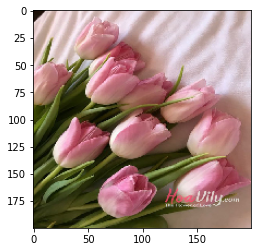

In [64]:
url='/content/ý-nghia-hoa-tulip-hong.jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])

1/1 [==============================] - 0s 46ms/step
[[5.1015958e-10 2.3852906e-09 1.9650108e-06 9.9706119e-01 2.9333315e-03
  7.6999342e-08 2.4651672e-06 3.5256346e-07 6.1449789e-08 4.8588845e-07]]
1/1 [==============================] - 0s 45ms/step
Đây là: daisy


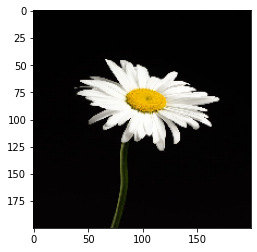

In [66]:
url='/content/AdobeStock_123583600-768x1024.jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])

1/1 [==============================] - 0s 202ms/step
[[4.2998027e-02 6.6217632e-07 8.0690071e-02 8.5502570e-06 8.7567157e-01
  2.2136314e-06 4.5279044e-04 3.4677021e-05 7.1415307e-05 6.9985603e-05]]
1/1 [==============================] - 0s 130ms/step
Đây là: dandelion


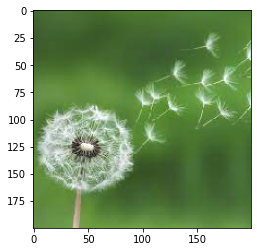

In [70]:
url='/content/download.jpg'
img=load_img(url,target_size=(200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img.reshape(1,200,200,3)
img=img/255
print(mod.predict(img))
a= int(np.argmax(mod.predict(img),axis=1))
print("Đây là:",label[a])